In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install chart_studio
#from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
import plotly.figure_factory as ff
import chart_studio.plotly as py
import plotly.express as px

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#!unzip  '/content/drive/MyDrive/Assignments/Case_study_1/train.csv.zip' -d '/content/drive/MyDrive/Assignments/Case_study_1'

Archive:  /content/drive/MyDrive/Assignments/Case_study_1/train.csv.zip
  inflating: /content/drive/MyDrive/Assignments/Case_study_1/train.csv/train.csv  


In [99]:
train_data = pd.read_csv(r'/content/drive/MyDrive/Assignments/Case_study_1/train.csv/train.csv')
test_data = pd.read_csv(r'/content/drive/MyDrive/Assignments/Case_study_1/test.csv/test.csv')

In [ ]:
train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [ ]:
print("Train data shape",train_data.shape)
print("Train data",train_data.describe() )

Train data shape (647054, 7)
Train data             TripType    VisitNumber           Upc      ScanCount  \
count  647054.000000  647054.000000  6.429250e+05  647054.000000   
mean       58.584511   96167.640078  3.060698e+10       1.108878   
std       157.635533   55545.485154  9.120134e+10       0.700776   
min         3.000000       5.000000  8.340000e+02     -12.000000   
25%        27.000000   49268.000000  3.400001e+09       1.000000   
50%        39.000000   97074.000000  7.050103e+09       1.000000   
75%        40.000000  144316.000000  3.006531e+10       1.000000   
max       999.000000  191347.000000  9.789707e+11      71.000000   

       FinelineNumber  
count   642925.000000  
mean      3726.884567  
std       2780.966158  
min          0.000000  
25%       1404.000000  
50%       3352.000000  
75%       5501.000000  
max       9998.000000  


Let's check if the data has any duplicates, we can observe that there are 10815 rows of duplicate, so we keep one record of duplicate record and remove remaining same records.

In [24]:
train_data.loc[train_data.duplicated(keep=False)]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
55,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
59,42,19,Friday,7.675336e+09,1,IMPULSE MERCHANDISE,8904.0
134,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
135,26,61,Friday,7.535309e+09,1,HARDWARE,5525.0
460,8,225,Friday,4.093000e+03,1,PRODUCE,4008.0
...,...,...,...,...,...,...,...
646430,24,191177,Sunday,7.065200e+09,1,COOK AND DINE,905.0
646514,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
646525,39,191190,Sunday,7.893138e+10,1,PETS AND SUPPLIES,6210.0
646773,44,191277,Sunday,6.791453e+09,1,IMPULSE MERCHANDISE,347.0


In [25]:
train_data.loc[train_data.duplicated()].shape

(5704, 7)

As all the fields are same in the duplicate records we can remove them.

In [100]:
train_data = train_data.drop_duplicates()
train_data.shape

(641350, 7)

### Let's find the unique values for each column in the train data set

In [27]:
def unique_values_per_column(column):
  return train_data[column].nunique()

In [28]:
for i in train_data.columns:
  print("Number of unique values in", i,"", unique_values_per_column(i))

Number of unique values in TripType  38
Number of unique values in VisitNumber  95674
Number of unique values in Weekday  7
Number of unique values in Upc  97714
Number of unique values in ScanCount  39
Number of unique values in DepartmentDescription  68
Number of unique values in FinelineNumber  5195


##### So, from above we can see there are 38 visit types and it is a multi-class classification problem.

Now lets see for against each data field what is value count:

In [29]:
print('The number of the value each VisitNumber: \n{}'.format(train_data['VisitNumber'].value_counts().sort_values(ascending = False).head(5)))

The number of the value each VisitNumber: 
72439    205
88011    151
9181     113
60971    112
65792    111
Name: VisitNumber, dtype: int64


In [30]:
print('The number of the value each Trip type: \n{}'.format(train_data['TripType'].value_counts().sort_values(ascending = False).head(5)))
# So we can see below that trip type 40 has highest records

The number of the value each Trip type: 
40    173031
39     95019
37     38724
38     29393
25     27384
Name: TripType, dtype: int64


The same is evident below that trip type 40, 39 have higher records.

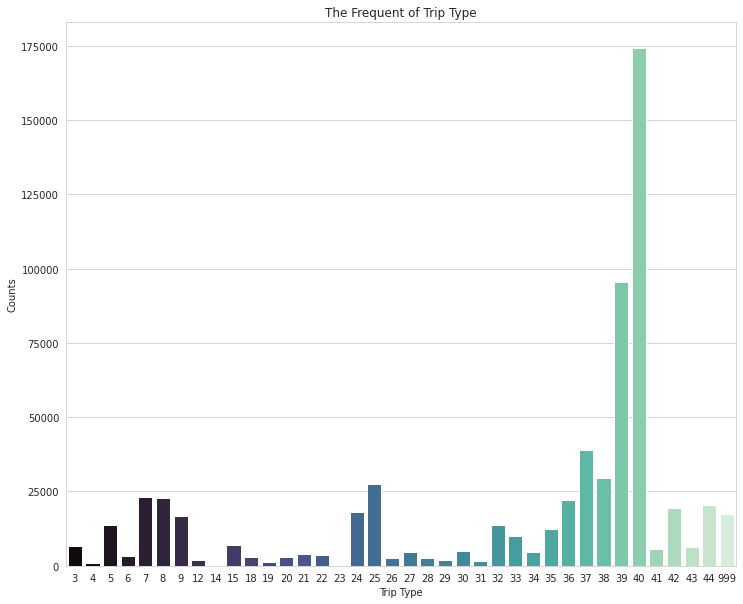

In [ ]:
#Reference: kaggle.com/code/naksungp/quick-eda-plus-model#EDA-2
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax = sns.countplot(x = 'TripType', data = train_data, palette = 'mako')
ax = ax.set(title = 'The Frequent of Trip Type', ylabel = 'Counts', xlabel = 'Trip Type')

Lets compare on which the trips were more based on weekdays

Text(0.5, 1.0, 'Trip type on weekdays')

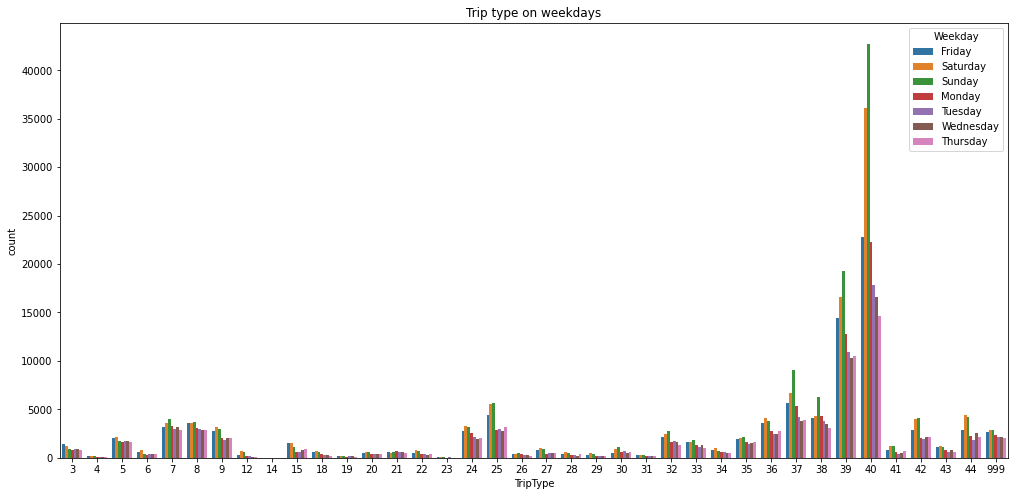

In [48]:
plt.figure(figsize = (17, 8))
sns.countplot(data=train_data, x="TripType", hue="Weekday")
plt.title('Trip type on weekdays')
## We can observe that trips 40, 39 which showed higher counts had more visits during Sundays

There are 68 unique departments.

In [47]:
train_data['DepartmentDescription'].nunique()

68

In [38]:
print('The number of the value each Department has: \n{}'.format(train_data['DepartmentDescription'].value_counts().sort_values(ascending = False).head(5)))
# So we can see below that GROCERY DRY GOODS,DSD GROCERY,PRODUCE has more visits

The number of the value each Department has: 
GROCERY DRY GOODS    70034
DSD GROCERY          67682
PRODUCE              50826
DAIRY                43599
PERSONAL CARE        41887
Name: DepartmentDescription, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 <a list of 68 Text major ticklabel objects>)

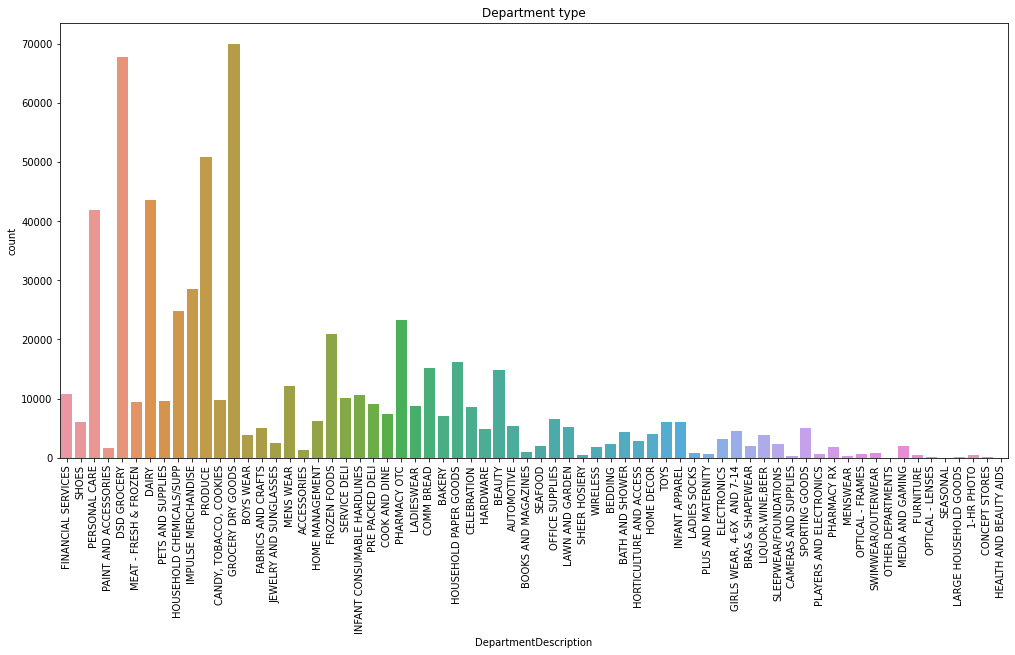

In [50]:
plt.figure(figsize = (17, 8))
sns.countplot(data=train_data, x="DepartmentDescription")
plt.title('Department type')
plt.xticks(rotation = 90)
## We can observe most sold product types are groceries, produce, dairy 

Department description is a categorical data so we can convert into separate columns for each category, so pd.get_dummies will be helpful.

In [101]:
# First checking number of null values in dept desc
train_data['DepartmentDescription'].isnull().sum()

1266

In [102]:
train_data['DepartmentDescription'].fillna( 'None', inplace = True)

In [103]:
train_data['DepartmentDescription'].isnull().sum()

0

In [104]:
dept = pd.get_dummies(train_data[['DepartmentDescription']])
train_data  = pd.concat([train_data, dept],axis = 1 )
train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('The number of the value for each Scan Count: \n{}'.format(train_data['ScanCount'].value_counts().sort_values(ascending = False).head(5)))

#As we can see below biggest number of item purchase per item per visit seem to be 1 or 2 items

The number of the value for each Scan Count: 
 1    561489
 2     53002
-1     14394
 3      9445
 4      4536
Name: ScanCount, dtype: int64


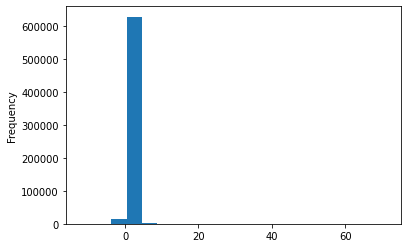

In [ ]:
train_data['ScanCount'].plot.hist(bins=20)
# We can observe below that scan count lies mostly between 1-2 

Scan count zero means item was purchased and returned,  so we have created a new column based on it where if scan count was positive we mark return as 0 else 1.

In [105]:
train_data['Return'] = train_data['ScanCount']

In [106]:
train_data.loc[train_data['ScanCount'] > 0, 'Return'] = 0 

In [108]:
train_data.loc[train_data['ScanCount'] < 0, 'Return'] = 1 

In [109]:
train_data['Return']

0         1
1         0
2         0
3         0
4         0
         ..
647049    0
647050    0
647051    0
647052    0
647053    0
Name: Return, Length: 641350, dtype: int64

Now after this we can check the weekday count, we can observe that weekend days has high count.

[Text(0, 0.5, 'Counts'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'The Frequent of Weekday')]

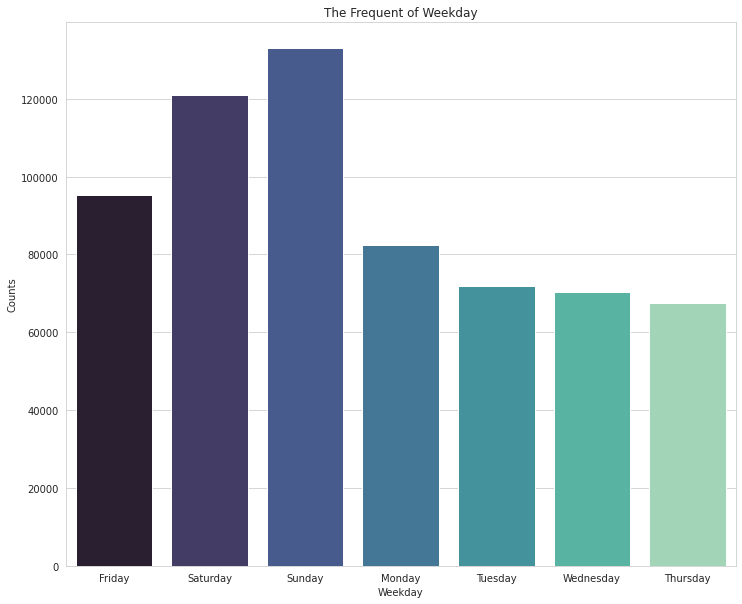

In [ ]:
plt.figure(figsize = (12, 10))

sns.set_style('whitegrid')
ax1 = sns.countplot(x = 'Weekday', data = train_data, palette = 'mako')
ax1.set(title = 'The Frequent of Weekday', ylabel = 'Counts', xlabel = 'Weekday')

As weekdays is also categorical data we convert days into its number.

In [110]:
day_number = pd.get_dummies(train_data['Weekday'])
train_data  = pd.concat([train_data, day_number],axis = 1 )
train_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,...,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,Return,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Fine line number is a more refined category for each of the products, created by Walmart

In [111]:
train_data['FinelineNumber'].value_counts().sort_values(ascending = False)

5501.0    8228
1508.0    5031
135.0     4509
808.0     4377
0.0       3827
          ... 
5216.0       1
7227.0       1
2850.0       1
5518.0       1
7130.0       1
Name: FinelineNumber, Length: 5195, dtype: int64

In [112]:
train_data[train_data['FinelineNumber'].isna()]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,...,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,Return,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
25,26,8,Friday,NaN,1,None,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
548,27,259,Friday,NaN,3,None,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
549,27,259,Friday,NaN,1,None,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
959,999,409,Friday,NaN,-1,None,NaN,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1116,39,479,Friday,NaN,1,None,NaN,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642784,39,190309,Sunday,NaN,1,None,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,0
643137,41,190408,Sunday,NaN,1,None,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,0
643991,44,190651,Sunday,NaN,1,None,NaN,0,0,0,...,0,0,0,0,0,0,1,0,0,0
645990,44,191080,Sunday,NaN,-1,None,NaN,0,0,0,...,0,0,1,0,0,0,1,0,0,0


There are overall 2878 of null values in Finelinenumber, we replace it with mean value.

In [113]:
train_data['FinelineNumber'].fillna(train_data['FinelineNumber'].mean(), inplace = True)

In [130]:
train_data['FinelineNumber'].mean()

3726.2028890851957

In [123]:
train_data['FinelineNumber'].isnull().sum()

0

Upc - the UPC number of the product purchased

In [115]:
train_data['Upc'].value_counts().sort_values(ascending = False)

4.011000e+03    7644
6.053886e+10    2494
7.874235e+09    2034
7.874235e+09    1847
4.046000e+03    1642
                ... 
4.893966e+11       1
7.871548e+09       1
7.874202e+09       1
8.394106e+09       1
5.440000e+09       1
Name: Upc, Length: 97714, dtype: int64

In [122]:
train_data['Upc'].isnull().sum()

2878

In [124]:
train_data['Upc'].fillna(train_data['Upc'].mode()[0], inplace = True)

In [125]:
train_data['Upc'].isnull().sum()

0

In [ ]:
train_data.drop(['Weekday', 'DepartmentDescription'], axis = 1, inplace = True)

In [127]:
train_data

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,DepartmentDescription_BAKERY,DepartmentDescription_BATH AND SHOWER,...,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS,Return,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,999,5,6.811315e+10,-1,1000.0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,30,7,6.053882e+10,1,8931.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,30,7,7.410811e+09,1,4504.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,26,8,2.238404e+09,2,3565.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,26,8,2.006614e+09,2,1017.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647049,39,191346,3.239000e+10,1,1118.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
647050,39,191346,7.874205e+09,1,1752.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
647051,39,191346,4.072000e+03,1,4170.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
647052,8,191347,4.190008e+09,1,1512.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
